In [1]:
import numpy as np
from PIL import Image
import os

In [2]:
listing = os.listdir('images/')
len(listing)

60000

In [3]:
def load(path="images/"):
    '''
    INPUT:
    path            : the path of folder to be processed
    
    OUTPUT:
    X, Y
    '''
    if path[-1] != '/':
        path += '/'
    
    listing = os.listdir(path)
    
    X = np.zeros((60000, 784))
    Y = np.zeros((60000, 1))
    
    for i in range(len(listing)):
        img = Image.open('images/' + listing[i]).convert('L')
        arr = np.asarray(img)
        label = listing[i][-5]
        X[i] = arr.flatten()
        Y[i] = label    
    return X, Y
    
X, Y = load()

[8.]


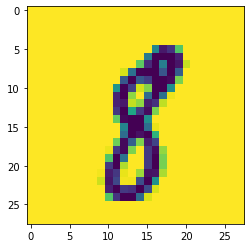

In [9]:
from matplotlib.pyplot import imshow

index = 300

%matplotlib inline
matrix = np.reshape(X[index], (28, 28))
img = Image.fromarray(matrix)
imshow(np.asarray(img))
print(Y[index])

In [10]:
from sklearn.model_selection import train_test_split
xTr, xTe, yTr, yTe = train_test_split(X, Y, test_size=0.05)

xTr, xVa, yTr, yVa = train_test_split(xTr, yTr, test_size=0.02, random_state=1)

In [11]:
print(xTr.shape)
print(yTr.shape)
print(xVa.shape)
print(yVa.shape)
print(xTe.shape)
print(yTe.shape)

(55860, 784)
(55860, 1)
(1140, 784)
(1140, 1)
(3000, 784)
(3000, 1)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xTr, yTr.ravel())

KNeighborsClassifier(n_neighbors=3)

In [13]:
knn.score(xVa, yVa)

0.9754385964912281

In [18]:
def imageResize(path):
    image = Image.open(path)
    size = (28, 28)
    image.thumbnail(size)
    image.save('testimage.png')

In [50]:
imageResize('test.png')

这次测试我们自己拍的照片
预测的数字是：8.0
实际的数字是：8


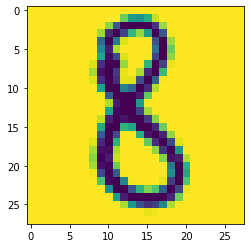

In [51]:
img = Image.open('testimage.png').convert('L')
arr = np.asarray(img)
label = 8
x = arr.flatten()
pred = knn.predict(x.reshape((1,784)))
print("这次测试我们自己拍的照片")
print("预测的数字是："+str(pred[0]))
print("实际的数字是："+str(label))

%matplotlib inline
matrix = np.reshape(x, (28, 28))
img = Image.fromarray(matrix)
imshow(np.asarray(img))

这次测试验证集中的第641个照片
预测的数字是：5.0
实际的数字是：5.0


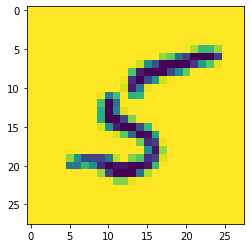

In [38]:
from random import randrange
index = randrange(1140)

%matplotlib inline
matrix = np.reshape(xVa[index], (28, 28))
img = Image.fromarray(matrix)
imshow(np.asarray(img))
x = np.reshape(xVa[index], (1, 784))
y_hat = knn.predict(x)[0]
y = yVa[index][0]
print("这次测试验证集中的第"+str(index+1)+"个照片")
print("预测的数字是："+str(y_hat))
print("实际的数字是："+str(y))

In [39]:
y_hat = np.reshape(knn.predict(xVa), (1140, 1))

In [11]:
wrong_indices = np.where(np.not_equal(y_hat, yVa))[0]
len(wrong_indices)

25

这次测试验证集中的第33个照片
预测的数字是：6.0
实际的数字是：5.0


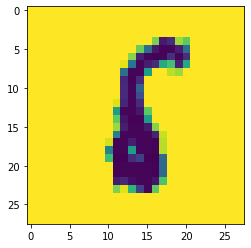

In [12]:
%matplotlib inline

from random import randrange
index = wrong_indices[randrange(25)]

matrix = np.reshape(xVa[index], (28, 28))
img = Image.fromarray(matrix)
imshow(np.asarray(img))
x = np.reshape(xVa[index], (1, 784))
y_hat = knn.predict(x)[0]
y = yVa[index][0]
print("这次测试验证集中的第"+str(index+1)+"个照片")
print("预测的数字是："+str(y_hat))
print("实际的数字是："+str(y))

In [13]:
np.unique(yVa[wrong_indices], return_counts=True)

(array([2., 3., 4., 5., 6., 7., 8., 9.]), array([3, 2, 5, 3, 1, 3, 5, 3]))

In [14]:
np.unique(yVa, return_counts=True)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([100, 141, 108,  98, 133,  98, 116, 134,  97, 115]))

In [15]:
from sklearn.neighbors import KNeighborsClassifier
ks = [1,2,3,4,5,6,7,8,9,10]
scores = np.zeros(10)

for i in range(len(ks)):
    k = ks[i]
    knn = KNeighborsClassifier(n_neighbors=k).fit(xTr, yTr.ravel())
    scores[i] = knn.score(xVa, yVa)
    
scores

array([0.97807018, 0.96578947, 0.97807018, 0.97280702, 0.9745614 ,
       0.97631579, 0.97631579, 0.97192982, 0.97192982, 0.97368421])

In [16]:
from sklearn.neural_network import MLPClassifier

In [17]:
nn_model = MLPClassifier(hidden_layer_sizes=(500,200,50,30,30,15)).fit(xTr, yTr)

/Users/zhaiguankai/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [18]:
nn_model.score(xVa, yVa)

0.12368421052631579

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
model = RandomForestClassifier(n_estimators=1000).fit(xTr, yTr)

<ipython-input-20-8936e23eea3f>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestClassifier(n_estimators=1000).fit(xTr, yTr)


In [21]:
model.score(xVa, yVa)

0.9719298245614035